## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ugs-applications/

/content/drive/MyDrive/ugs-applications


In [3]:
!pip3 install transformer_lens
!pip3 install seaborn
!pip3 install fancy_einsum
!pip3 install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
  Using cached nvidia

In [4]:
from evaluators.mcms_evaluator import run_MCMS

## Sweep over K

In [6]:
from tqdm import tqdm

results = {}
for k in tqdm([1,2,4,6,8,10,12,14,16,18,20,22,24,28,32,36,40,48,64,96]):
  head_losses, head_vars, n_batches_by_head, n_samples_by_head = run_MCMS(k =k)
  results[k] = {"head_losses" : head_losses,
                "head_vars" : head_vars,
                "n_batches_by_head": n_batches_by_head,
                "n_samples_by_head": n_samples_by_head,
                }


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 1
---------------------------
Dataset Config
---------------------


  5%|▌         | 1/20 [00:32<10:09, 32.06s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 2
----------------


 10%|█         | 2/20 [01:03<09:30, 31.70s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 4
----------------


 15%|█▌        | 3/20 [01:34<08:53, 31.38s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 6
----------------


 20%|██        | 4/20 [02:06<08:23, 31.47s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 8
----------------


 25%|██▌       | 5/20 [02:37<07:49, 31.32s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 10
---------------


 30%|███       | 6/20 [03:08<07:20, 31.47s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 12
---------------


 35%|███▌      | 7/20 [03:39<06:47, 31.33s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 14
---------------


 40%|████      | 8/20 [04:11<06:16, 31.34s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 16
---------------


 45%|████▌     | 9/20 [04:42<05:43, 31.26s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 18
---------------


 50%|█████     | 10/20 [05:13<05:11, 31.13s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 20
---------------


 55%|█████▌    | 11/20 [05:44<04:40, 31.18s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 22
---------------


 60%|██████    | 12/20 [06:15<04:09, 31.23s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 24
---------------


 65%|██████▌   | 13/20 [06:47<03:39, 31.38s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 28
---------------


 70%|███████   | 14/20 [07:19<03:09, 31.53s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 32
---------------


 75%|███████▌  | 15/20 [07:51<02:37, 31.57s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 36
---------------


 80%|████████  | 16/20 [08:22<02:05, 31.40s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 40
---------------


 85%|████████▌ | 17/20 [08:53<01:34, 31.42s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 48
---------------


 90%|█████████ | 18/20 [09:24<01:02, 31.25s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 64
---------------


 95%|█████████▌| 19/20 [09:55<00:31, 31.17s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 96
---------------


100%|██████████| 20/20 [10:26<00:00, 31.34s/it]

---------------------------
Finished Evaluation


In [17]:
for k, result in results.items():
  print(k, "avg var: " , (result["head_vars"].mean()*100000).round().item()/100000, "avg_loss: " , (result["head_losses"].mean()*100000).round().item()/100000)

1 avg var:  0.00131 avg_loss:  -0.01206
2 avg var:  0.00141 avg_loss:  -0.01199
4 avg var:  0.00223 avg_loss:  -0.01231
6 avg var:  0.00187 avg_loss:  -0.01211
8 avg var:  0.00284 avg_loss:  -0.01265
10 avg var:  0.00449 avg_loss:  -0.01237
12 avg var:  0.00297 avg_loss:  -0.01275
14 avg var:  0.00347 avg_loss:  -0.01275
16 avg var:  0.0035 avg_loss:  -0.0129
20 avg var:  0.0051 avg_loss:  -0.0137
24 avg var:  0.00604 avg_loss:  -0.0143
32 avg var:  0.00748 avg_loss:  -0.01544
48 avg var:  0.01052 avg_loss:  -0.01913
64 avg var:  0.01574 avg_loss:  -0.02355
96 avg var:  0.02128 avg_loss:  -0.0349


In [7]:
import pickle

single_component_head_losses = pickle.load(open("atp/ioi" + "/single_component_head_losses.pkl", "rb"))
single_component_head_vars = pickle.load(open("atp/ioi" + "/single_component_head_vars.pkl", "rb"))

In [8]:
# prompt: calculate R^2 between single_component_head_losses and each result["head_losses"] in results

from scipy.stats import spearmanr

for k, result in results.items():
  r, _ = spearmanr(single_component_head_losses[:144].cpu().squeeze(), result["head_losses"].cpu().squeeze())
  print(f"Spearman corr for k={k}: {r**2}")


Spearman corr for k=1: 0.9656012357589941
Spearman corr for k=2: 0.9501587562420906
Spearman corr for k=4: 0.9428783074987018
Spearman corr for k=6: 0.870923569294494
Spearman corr for k=8: 0.8401525245618608
Spearman corr for k=10: 0.8294083533647035
Spearman corr for k=12: 0.7908571634063267
Spearman corr for k=14: 0.7074931417791858
Spearman corr for k=16: 0.6576491651316826
Spearman corr for k=18: 0.6755185661920278
Spearman corr for k=20: 0.6293956328464033
Spearman corr for k=22: 0.5860720267858166
Spearman corr for k=24: 0.5227821178190786
Spearman corr for k=28: 0.5049095684044089
Spearman corr for k=32: 0.4300728176806438
Spearman corr for k=36: 0.3830138393075457
Spearman corr for k=40: 0.36798690576695875
Spearman corr for k=48: 0.25772699507239655
Spearman corr for k=64: 0.217732767644877
Spearman corr for k=96: 0.1940572103818489


In [19]:
import pandas as pd

for k, result in results.items():
  result["estimator bias"] = (result["head_losses"] * (-1) - single_component_head_losses[:144]).mean().item()
  result["estimator variance"] = (result["head_vars"]/ result["n_samples_by_head"]).mean().item()
  result["estimator std"] = result["estimator variance"]**0.5
  result["spearman"] = spearmanr(single_component_head_losses[:144].cpu().squeeze(), result["head_losses"].cpu().squeeze() * (-1))[0]


df = pd.DataFrame({"k": [k for k in results.keys()],
                   "estimator bias": [result["estimator bias"] for result in results.values()],
                   "estimator var": [result["estimator variance"] for result in results.values()],
                   "estimator std": [result["estimator std"] for result in results.values()],
                   "spearmanr":[result["spearman"] for result in results.values()] })
df["mse"] = df["estimator bias"]**2 + df["estimator var"]
df["mae"] = df["mse"] ** 0.5
df

,k,estimator bias,estimator var,estimator std,spearmanr,mse,mae
0,1,-0.000079,0.000018,0.004269,0.982650,0.000018,0.004270
1,2,0.000552,0.000016,0.004041,0.974761,0.000017,0.004078
2,4,-0.000184,0.000007,0.002640,0.971019,0.000007,0.002646
3,6,0.000328,0.000007,0.002560,0.933233,0.000007,0.002581
4,8,0.000073,0.000006,0.002420,0.916598,0.000006,0.002421
5,10,0.000442,0.000005,0.002197,0.910719,0.000005,0.002241
6,12,0.000752,0.000004,0.002092,0.889302,0.000005,0.002223
7,14,0.000575,0.000004,0.001929,0.841126,0.000004,0.002013
8,16,0.001032,0.000005,0.002160,0.810956,0.000006,0.002394
9,18,0.001174,0.000004,0.001907,0.821899,0.000005,0.002239


<Axes: xlabel='k'>

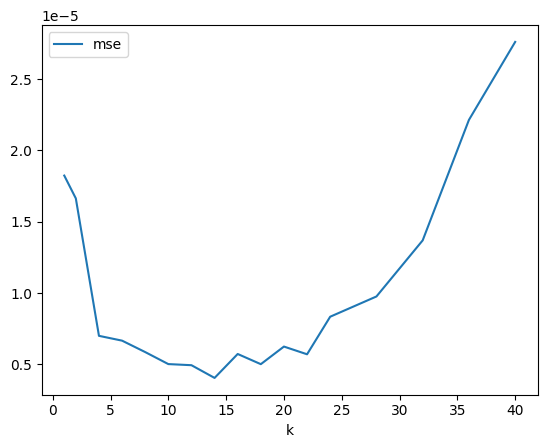

In [10]:
df[df["k"] < 48].plot(x = "k", y = [ "mse"])

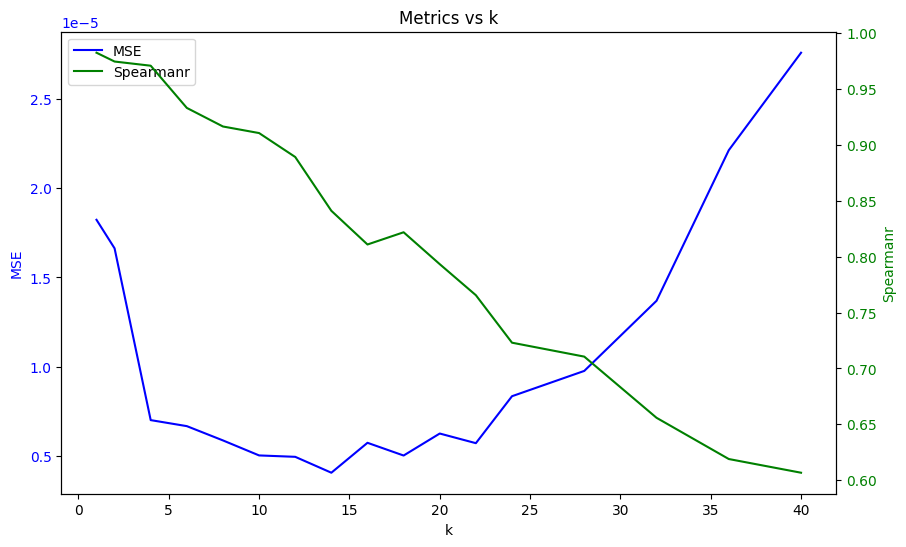

In [37]:
import matplotlib.pyplot as plt

df_filtered = df[df["k"] < 48]

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(df_filtered['k'], df_filtered['mse'], 'b-', label='MSE')
ax1.set_xlabel('k')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for spearmanr
ax2 = ax1.twinx()
ax2.plot(df_filtered['k'], df_filtered['spearmanr'], 'g-', label='Spearmanr')
ax2.set_ylabel('Spearmanr', color='g')
ax2.tick_params(axis='y', labelcolor='g')


# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2,  loc='upper left')

plt.title('Metrics vs k')
plt.show()


In [15]:
result["head_losses"].cpu().squeeze() * (-1)

tensor([ 1.6290e-02, -1.8365e-01,  2.7563e-02,  2.0450e-01, -4.0196e-02,
         2.0890e-02, -3.8856e-02,  3.4075e-02,  7.7159e-02,  2.5721e-01,
         1.2737e-01, -4.5210e-02,  1.2918e-02,  8.6590e-02, -5.0319e-02,
         7.2812e-02,  7.6923e-03,  3.9969e-03,  1.7138e-02,  9.0571e-02,
         1.3567e-01, -5.1751e-02, -1.1998e-02,  6.4741e-03,  2.4486e-02,
         4.7862e-02,  3.9748e-02, -7.3589e-03, -2.1218e-02,  4.2705e-02,
         4.9416e-03, -9.3264e-03,  6.1609e-02,  5.4479e-02, -3.3396e-02,
         5.9146e-02,  4.4446e-02,  5.2902e-03,  4.5845e-02, -1.9467e-02,
         2.1532e-02,  4.8266e-02,  2.9967e-02,  1.2000e-01,  6.0355e-02,
        -3.6064e-02, -6.1975e-03, -3.1118e-02,  6.2243e-02, -1.4978e-02,
         9.5767e-03,  1.2083e-01,  1.1040e-02,  6.4986e-03,  5.4722e-02,
        -2.3100e-02,  3.0022e-02, -4.1767e-03,  5.1899e-03,  1.0579e-01,
         3.2370e-02, -9.1098e-04,  5.4734e-02, -3.8530e-03,  3.6172e-02,
         1.3637e-01, -9.1352e-03, -2.1725e-02,  8.0